<a href="https://colab.research.google.com/github/Jjmorenog/SimulacionUllanos2023/blob/main/3er_Parcial_SC_2PA_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3er Parcial - Simulación Computacional 1PA-2023
Diciembre 6 de 2023 - Máxima fecha y hora de entrega: Diciembre 6 de 2023 a las 04:00 pm

**Juan José Moreno Guerra-160003726**

*Subir a Moodle el archivo .ipynb desarrollado y ejecutado de este Notebook y el archivo .nlogo desarrollado del punto 2, así como los demás archivos adicionales de soporte que haya utilizado.*

## 1. (1.5 puntos)
Tomando como referencia la implementación y visualización de automatas celulares en Python de **Vladimir Ilievski** (excluyendo la sección de animación) y disponible en: https://github.com/IlievskiV/Amusive-Blogging-N-Coding/blob/master/Cellular%20Automata/cellular_automata.ipynb, haga lo siguiente:

*   Use la regla 184 ([Wolfram Rule 184](https://en.wikipedia.org/wiki/Rule_184)).
*   Fije el número de 15 celdas por fila (`size=15`).
*   Fije el paso del tiempo para 10 pasos (`steps=10`), i.e. desde $t=0$ hasta $t=9$.
*   Fije la posición del impulso para aplicar la regla en el la celda central (`impulse_pos='center'`)
*   Incluya una opción de condiciones iniciales fijada (`init_cond='fixed'`) para la primera fila ($t=0$) de acuerdo con la siguiente imagen:

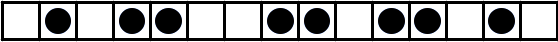

*   De acuerdo con las diapositivas 38 y 39 de las diapositivas ["9. Cellular Automata.pptx"](https://docs.google.com/presentation/d/14r5qPAEn5kDMzA68OTaStPDboiTRBg3Y/edit?usp=sharing&ouid=104851069191213232315&rtpof=true&sd=true), calcule para $t=1$ hasta $t=10$ el número de autos $N(t)$ en el instante de tiempo $t$ en el segmento de tamaño $L=15$, la densidad de autos $\rho(t)$ en el instante de tiempo $t$, el número de autos que se mueven $M(t)$ en el instante de tiempo $t$, la velocidad promedio $<v>$ y el flujo de tráfico $j$ en el instante de tiempo $t$.



In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
powers_of_two = np.array([[4], [2], [1]])  # shape (3, 1)

def step(x, rule_binary):
    """Makes one step in the cellular automaton.

    Args:
        x (np.array): current state of the automaton
        rule_binary (np.array): the update rule

    Returns:
        np.array: updated state of the automaton
    """
    x_shift_right = np.roll(x, 1)  # circular shift to right
    x_shift_left = np.roll(x, -1)  # circular shift to left
    y = np.vstack((x_shift_right, x, x_shift_left)).astype(np.int8)  # stack row-wise, shape (3, cols)
    z = np.sum(powers_of_two * y, axis=0).astype(np.int8)  # LCR pattern as number

    return rule_binary[7 - z]

def WR184(x, steps):
  x2= np.zeros(len(x))

  for i in range(0,len(x)):
      if(i==len(x)-1):
        if((x[i-1]==1 and x[i]==0)):
          x2[i]=1
        else:
          x2[i]=0

      elif(i==0):
        if(x[i]==1):
          if(x[i+1]==1):
            x2[i]=1
          else:
            x2[i]=0
        else:
          x2[i]=0

      else:
        if(x[i-1]==0):
          if(x[i]==0):
            x2[i]=0
          elif(x[i]==1):
            if(x[i+1]==1):
              x2[i]=1
            else:
              x2[i]=0
        elif(x[i-1]==1):
          if(x[i]==0):
            x2[i]=1
          else:
            if(x[i+1]==1):
              x2[i]=1
            else:
              x2[i]==0

  return x2

In [ ]:
def cellular_automaton(rule_number, size, steps,
                       init_cond='random', impulse_pos='center'):
    """Generate the state of an elementary cellular automaton after a pre-determined
    number of steps starting from some random state.

    Args:
        rule_number (int): the number of the update rule to use
        size (int): number of cells in the row
        steps (int): number of steps to evolve the automaton
        init_cond (str): either `random` or `impulse`. If `random` every cell
        in the row is activated with prob. 0.5. If `impulse` only one cell
        is activated.
        impulse_pos (str): if `init_cond` is `impulse`, activate the
        left-most, central or right-most cell.

    Returns:
        np.array: final state of the automaton
    """
    assert 0 <= rule_number <= 255
    assert init_cond in ['random', 'impulse', 'fixed']
    assert impulse_pos in ['left', 'center', 'right']

    rule_binary_str = "010110011011010"
    rule_binary = np.array([int(ch) for ch in rule_binary_str], dtype=np.int8)
    x = np.zeros((steps, size), dtype=np.int8)

    if init_cond == 'fixed':
      x[0,0] = 0
      x[0,1] = 1
      x[0,2] = 0
      x[0,3] = 1
      x[0,4] = 1
      x[0,5] = 0
      x[0,6] = 0
      x[0,7] = 1
      x[0,8] = 1
      x[0,9] = 0
      x[0,10] = 1
      x[0,11] = 1
      x[0,12] = 0
      x[0,13] = 1
      x[0,14] = 0


    if init_cond == 'random':  # random init of the first step
        x[0, :] = np.array(np.random.rand(size) < 0.5, dtype=np.int8)

    if init_cond == 'impulse':  # starting with an initial impulse
        if impulse_pos == 'left':
            x[0, 0] = 1
        elif impulse_pos == 'right':
            x[0, size - 1] = 1
        else:
            x[0, size // 2] = 1

    for i in range(steps-1):
      x[i+1,:] = WR184(x[i,:],steps)
    return x

In [ ]:
def stats(x, L):
  ro = 0
  N = 0
  count1 = 0 #Total de carros
  count2 = 0 #Carros moviéndose
  for i in range(len(x)):
    if(x[i]==1):
      N=N +1
  ro = N / L

  return [ro, N]


def moved(x):
  M = 0
  for i in range(0,len(x),1):
    if(i==len(x)-1 and x[i]==1):
      M = M + 1
    else:
      if(x[i]==1 and x[i+1]==0):
        M = M + 1
  return M

In [ ]:
rule_number = 184  # select the update rule
size = 15  # number of cells in one row
steps = 10  # number of time steps
init_cond='fixed'  # start with only one cell
impulse_pos='center'  # start with the left-most cell

x = cellular_automaton(rule_number, size, steps, init_cond, impulse_pos)

t1 =1
t2 = 9

for i in range(t1,t2+1):
  data = stats(x[i], size)
  M = moved(x[i-1])
  V = M/data[1]
  F = data[0]*V

  print("*******************************************")
  print("Instate de tiempo t =",i)
  print("La densidad de autos es:",data[0])
  print("Número de autos:",data[1])
  print("Número de autos que se movimieron:",M)
  print("Velocidad promedio:",V)
  print("Flujo de tráfico:",F)
  print("*******************************************\n")

*******************************************
Instate de tiempo t = 1
La densidad de autos es: 0.5333333333333333
Número de autos: 8
Número de autos que se movimieron: 5
Velocidad promedio: 0.625
Flujo de tráfico: 0.3333333333333333
*******************************************

*******************************************
Instate de tiempo t = 2
La densidad de autos es: 0.4666666666666667
Número de autos: 7
Número de autos que se movimieron: 6
Velocidad promedio: 0.8571428571428571
Flujo de tráfico: 0.39999999999999997
*******************************************

*******************************************
Instate de tiempo t = 3
La densidad de autos es: 0.4666666666666667
Número de autos: 7
Número de autos que se movimieron: 6
Velocidad promedio: 0.8571428571428571
Flujo de tráfico: 0.39999999999999997
*******************************************

*******************************************
Instate de tiempo t = 4
La densidad de autos es: 0.4
Número de autos: 6
Número de autos que se movim

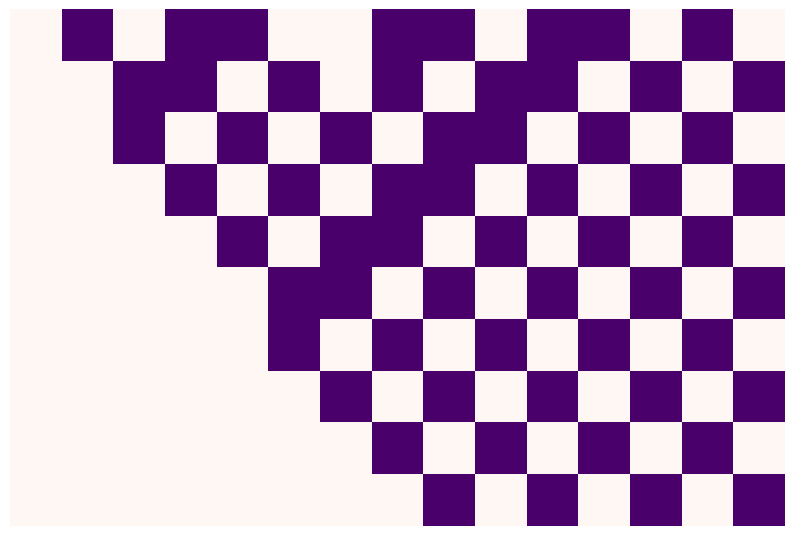

In [ ]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes()
ax.set_axis_off()

ax.imshow(x, interpolation='none',cmap='RdPu')
plt.savefig('elementary_cellular_automaton.png', dpi=300, bbox_inches='tight')

## 2.  (1.5 puntos)
Abra el modelo del juego de la vida de Conway implementado en la versión Web de NetLogo en el siguiente enlace: http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Computer%20Science/Cellular%20Automata/Life.nlogo, y haga cada paso tomando la respectiva captura de pantalla completa del navegador:

a) Deshabilite el modo Interactivo (quitar candado) para editar el mundo dando click derecho sobre éste y modifíquelo para que la mínima coordenada para parches sea de -10 y la máxima de 10 tanto en eje X como en el eje Y con el parche de centro como origen (0,0) y tamaño de parche de 25.

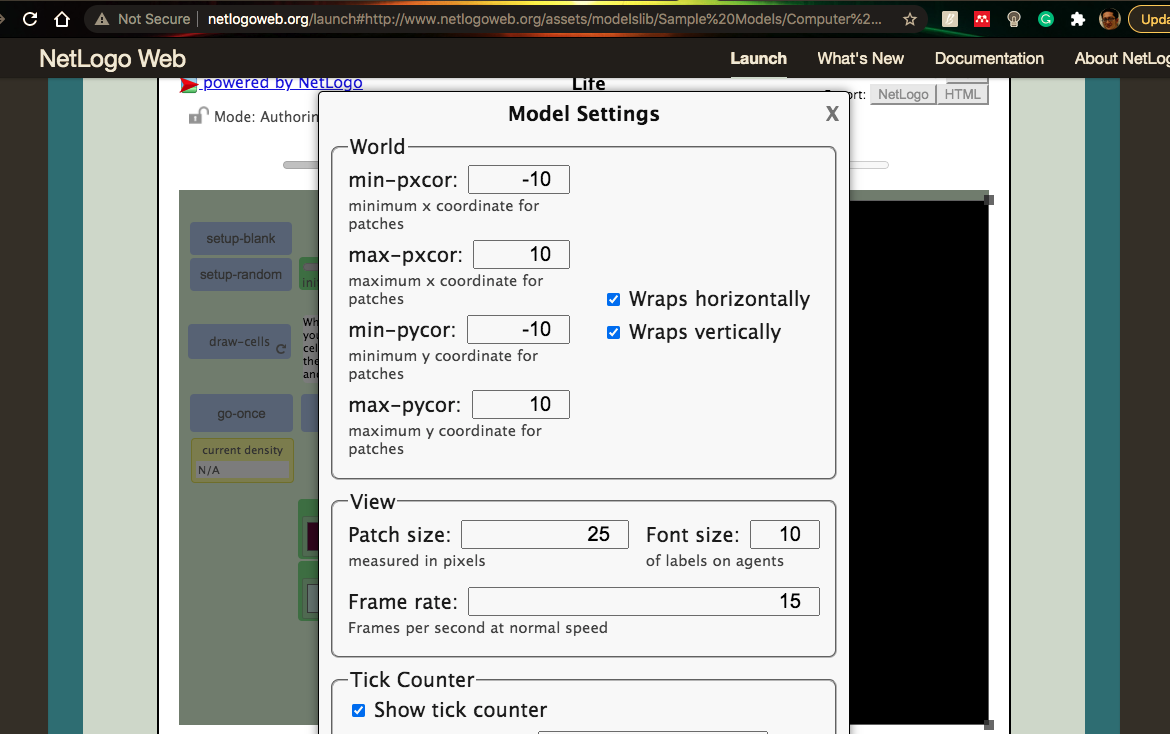


b) Cree un procedimiento llamado _init-pattern_ que sea llamado al final del procedimiento _setup-blank_ que permita visualizar el siguiente patrón:

<center>

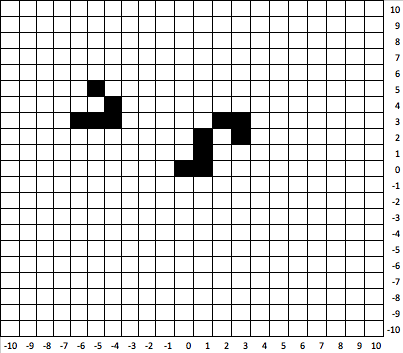
</center>

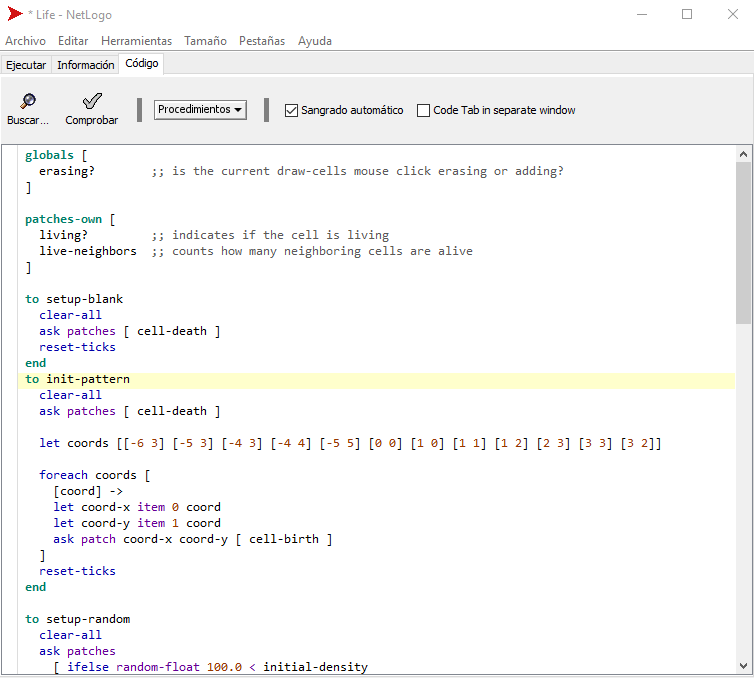

c) Ejecute el comando _go-forever_ y además de la captura de pantalla al final de la iteración 25, indique el respectivo nombre del patrón.

d)  Si al iniciar el patrón de acuerdo con la imagen del patrón de la izquierda es el _glider_, ¿Qué nombre se le podría dar al patrón estático de la derecha?

e) Exporte el modelo de NetLogo (esquina superior derecha) el cual descargará el archivo _Life.nlogo_, renombrelo con su código estudiantil (e.g. 160000514.nlogo) y envielo adjunto junto con este archivo de .ipynb

C) **Nombre del patron: LOAF**

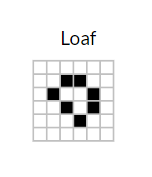





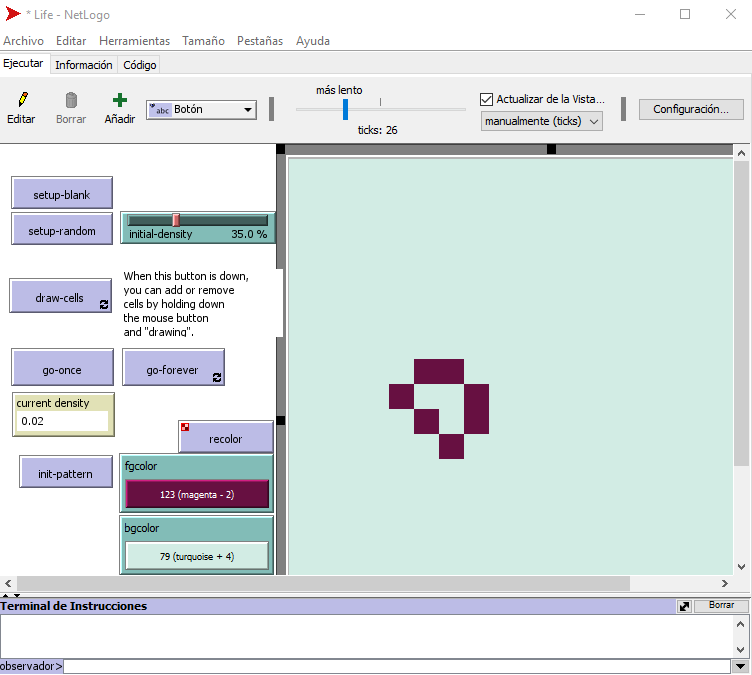

D) RTA: Se le podria poner el nombre de: hook o fish hook al patrón estático de la derecha por que se asemeja aun azuelo para pescar o tambien a un gancho

## 3. (2.0 puntos)
Usando la implementación del algoritmo de [Lattice Boltzmann modeling of fluid flow](https://docs.google.com/presentation/d/1IsrFu84ZYFavFDADKD_2dwG9Ex1ztrmN/edit?usp=sharing&ouid=104851069191213232315&rtpof=true&sd=true) (diapositivas 102 y 103 de la presentación), o el archivo de Jupyter Notebook [Lattice Boltzmann modeling of fluid flow.ipynb](https://colab.research.google.com/drive/11hnr-jwVAFKzwz0zePp6Pb5Gy9Yx6hhj?usp=sharing), realice lo siguiente:

**a.** Modifique los siguientes parámetros

*   `maxIter = 18000    # Total number of time iterations`
*   `nx, ny = 100, 40   # Number of lattice nodes`

**b.** Añada otro obstáculo adicional al existente tipo cilindro en la posición en x = 60, y = 20, r = 10.

**c.** Ejecute la simulación con el número de Reynolds $Re=50$ y $Re=280$ y calcule la**velocidad máxima**, la **velocidad mínima** y la **velocidad promedio**.




In [ ]:
!pip install celluloid

In [ ]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from celluloid import Camera # getting the camera
from IPython.display import HTML
import os
import statistics

**Re=50**

In [ ]:
### Flow definition
maxIter = 18000    # Total number of time iterations
Re = 50.0           # Reynolds number
nx, ny = 100, 40   # Number of lattice nodes
ly = ny-1           # Height of the domain in lattice units
cx, cy, r = nx//4, ny//2, ny//9 # Coordinates of the cylinder
uLB = 0.04                      # Velocity in lattice units.
nulb = uLB*r/Re                 # Viscoscity in lattice units.
omega = 1 / (3*nulb+0.5)        # Relaxation parameter

### Lattice constants
v = array([ [ 1,  1], [ 1, 0], [ 1, -1], [ 0,  1], [0, 0],
            [ 0, -1], [-1, 1], [-1,  0], [-1, -1] ])
t = array([ 1/36, 1/9, 1/36, 1/9, 4/9, 1/9, 1/36, 1/9, 1/36 ])

col1 = array([0, 1, 2])
col2 = array([3, 4, 5])
col3 = array([6, 7, 8])

###### Function Definitions
def macroscopic(fin):
    rho = sum(fin, axis=0)
    u = zeros((2, nx, ny))
    for i in range(9):
        u[0,:,:] += v[i,0] * fin[i,:,:]
        u[1,:,:] += v[i,1] * fin[i,:,:]
    u /= rho
    return rho, u

def equilibrium(rho, u):
    usqr = 3/2 * (u[0]**2 + u[1]**2)
    feq = zeros((9,nx,ny))
    for i in range(9):
        cu = 3 * (v[i,0]*u[0,:,:] + v[i,1]*u[1,:,:])
        feq[i,:,:] = rho*t[i] * (1 + cu + 0.5*cu**2 - usqr)
    return feq

###### Setup: cylindrical obstacle and velocity inlet with perturbations
# Creation of a mask with 1/0 values, defining the shape of the obstacle.

def obstacle_fun(x, y):
    return np.logical_or((x-cx)**2 + (y-cy)**2 < r**2, (x-60)**2 + (y-20)**2 < 10**2)

obstacle = fromfunction(obstacle_fun, (nx,ny))

# Initial velocity profile: almost zero, with a slight perturbation to trigger
# the instability
def inivel(d, x, y):
    return (1-d) * uLB * (1 + 1e-4*sin(y/ly*2*pi))

vel = fromfunction(inivel, (2,nx,ny))

# Initialization of the populations at equilibrium with the given velocity.
fin = equilibrium(1, vel)

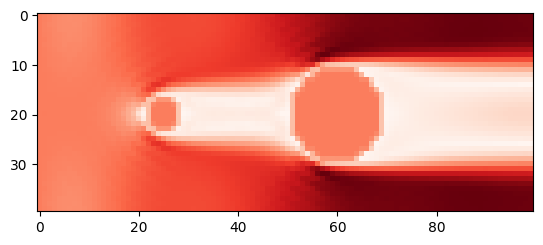

In [ ]:
fig, ax = plt.subplots()
camera = Camera(fig)
# Vectores de velocidades
velMax = []
velMin = []
velProm = []

###### Main time loop
for time in range(maxIter):
    # Right wall: outflow condition
    fin[col3,-1,:] = fin[col3,-2,:]

    # Compute macroscopic variables, density and velocity.
    rho, u = macroscopic(fin)

    # Left wall: inflow condition.
    u[:,0,:] = vel[:,0,:]
    rho[0,:] = 1/(1-u[0,0,:]) * ( sum(fin[col2,0,:], axis=0) +
                                 2*sum(fin[col3,0,:], axis=0) )
    # Compute equilibrium.
    feq = equilibrium(rho, u)
    fin[[0,1,2],0,:] = feq[[0,1,2],0,:] + fin[[8,7,6],0,:] - feq[[8,7,6],0,:]

    # Collision step.
    fout = fin - omega * (fin -feq)

    # Bounce-back condition for obstacle.
    for i in range(9):
        fout[i, obstacle] = fin[8-i, obstacle]

    # Streaming step
    for i in range(9):
        fin[i,:,:] = roll( roll(fout[i,:,:], v[i,0], axis=0),
                          v[i,1], axis=1)

    # Visualization of the velocity
    if (time%100==0):

        valueVelocity = sqrt(u[0]**2+u[1]**2)
        for vrow in valueVelocity:
          calcMeanVel = statistics.mean(vrow)
          velProm.append(calcMeanVel)
          velMin.append(min(vrow))
          velMax.append(max(vrow))
        img_obj = sqrt(u[0]**2+u[1]**2).transpose()
        ax.imshow(img_obj,cmap=cm.Reds)
        camera.snap()

In [ ]:
animation = camera.animate()
HTML(animation.to_html5_video())

In [ ]:
print("La velocidad promedio del fluido para Re=50 es de", statistics.mean(velProm))
print("La velocidad maxima del fluido para Re=50 es de", max(velMax))
print("La velocidad minima del fluido para Re=50 es de", min(velMin))

La velocidad promedio del fluido para Re=50 es de 0.04546115191393682
La velocidad maxima del fluido para Re=50 es de 0.11608739339179173
La velocidad minima del fluido para Re=50 es de 4.345928405671174e-06


**Re=280**

In [ ]:
### Flow definition
maxIter = 18000    # Total number of time iterations
Re = 280.0           # Reynolds number
nx, ny = 100, 40   # Number of lattice nodes
ly = ny-1           # Height of the domain in lattice units
cx, cy, r = nx//4, ny//2, ny//9 # Coordinates of the cylinder
uLB = 0.04                      # Velocity in lattice units.
nulb = uLB*r/Re                 # Viscoscity in lattice units.
omega = 1 / (3*nulb+0.5)        # Relaxation parameter

### Lattice constants
v = array([ [ 1,  1], [ 1, 0], [ 1, -1], [ 0,  1], [0, 0],
            [ 0, -1], [-1, 1], [-1,  0], [-1, -1] ])
t = array([ 1/36, 1/9, 1/36, 1/9, 4/9, 1/9, 1/36, 1/9, 1/36 ])

col1 = array([0, 1, 2])
col2 = array([3, 4, 5])
col3 = array([6, 7, 8])

###### Function Definitions
def macroscopic(fin):
    rho = sum(fin, axis=0)
    u = zeros((2, nx, ny))
    for i in range(9):
        u[0,:,:] += v[i,0] * fin[i,:,:]
        u[1,:,:] += v[i,1] * fin[i,:,:]
    u /= rho
    return rho, u

def equilibrium(rho, u):
    usqr = 3/2 * (u[0]**2 + u[1]**2)
    feq = zeros((9,nx,ny))
    for i in range(9):
        cu = 3 * (v[i,0]*u[0,:,:] + v[i,1]*u[1,:,:])
        feq[i,:,:] = rho*t[i] * (1 + cu + 0.5*cu**2 - usqr)
    return feq

###### Setup: cylindrical obstacle and velocity inlet with perturbations
# Creation of a mask with 1/0 values, defining the shape of the obstacle.

def obstacle_fun(x, y):
    return np.logical_or((x-cx)**2 + (y-cy)**2 < r**2, (x-60)**2 + (y-20)**2 < 10**2)

obstacle = fromfunction(obstacle_fun, (nx,ny))

# Initial velocity profile: almost zero, with a slight perturbation to trigger
# the instability
def inivel(d, x, y):
    return (1-d) * uLB * (1 + 1e-4*sin(y/ly*2*pi))

vel = fromfunction(inivel, (2,nx,ny))

# Initialization of the populations at equilibrium with the given velocity.
fin = equilibrium(1, vel)

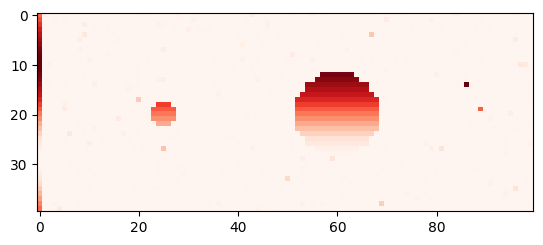

In [ ]:
fig, ax = plt.subplots()
camera = Camera(fig)
# Vectores de velocidades
velMax2 = []
velMin2 = []
velProm2 = []

###### Main time loop
for time in range(maxIter):
    # Right wall: outflow condition
    fin[col3,-1,:] = fin[col3,-2,:]

    # Compute macroscopic variables, density and velocity.
    rho, u = macroscopic(fin)

    # Left wall: inflow condition.
    u[:,0,:] = vel[:,0,:]
    rho[0,:] = 1/(1-u[0,0,:]) * ( sum(fin[col2,0,:], axis=0) +
                                 2*sum(fin[col3,0,:], axis=0) )
    # Compute equilibrium.
    feq = equilibrium(rho, u)
    fin[[0,1,2],0,:] = feq[[0,1,2],0,:] + fin[[8,7,6],0,:] - feq[[8,7,6],0,:]

    # Collision step.
    fout = fin - omega * (fin -feq)

    # Bounce-back condition for obstacle.
    for i in range(9):
        fout[i, obstacle] = fin[8-i, obstacle]

    # Streaming step
    for i in range(9):
        fin[i,:,:] = roll( roll(fout[i,:,:], v[i,0], axis=0),
                          v[i,1], axis=1)

    # Visualization of the velocity
    if (time%100==0):
        img_obj = sqrt(u[0]**2+u[1]**2).transpose()
        ax.imshow(img_obj,cmap=cm.Reds)
        camera.snap()
        valueVelocity = sqrt(u[0]**2+u[1]**2)
        for vrow in valueVelocity:
          calcMeanVel = statistics.mean(vrow)
          velProm2.append(calcMeanVel)
          velMin2.append(min(vrow))
          velMax2.append(max(vrow))


In [ ]:
animation = camera.animate()
HTML(animation.to_html5_video())

In [ ]:
print("La velocidad promedio del fluido para Re=280 es de", statistics.mean(velProm2))
print("La velocidad maxima del fluido para Re=280 es de", max(velMax2))
print("La velocidad minima del fluido para Re=280 es de", min(velMin2))

La velocidad promedio del fluido para Re=280 es de nan
La velocidad maxima del fluido para Re=280 es de 8724.361732403187
La velocidad minima del fluido para Re=280 es de 1.8832725172694333e-05
